<a href="https://colab.research.google.com/github/engSalah-dot/water-temperature-regression/blob/main/classification-models-evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification LAB**

In [66]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [40]:
X,Y=make_classification(n_samples=1000,n_features=20,n_classes=2,random_state=42)
df=pd.DataFrame(X,columns=[f'Feature{i}' for i in range(0,X.shape[1])])
df['Target']=Y

df

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Target
0,-0.669356,-1.495778,-0.870766,1.141831,0.021606,1.730630,-1.251698,0.289305,0.357163,-0.196811,...,0.154850,-0.219970,-0.739137,1.802012,1.634606,-0.938180,-1.267337,-1.276334,1.016643,1
1,0.093372,0.785848,0.105754,1.272354,-0.846316,-0.979093,1.263707,0.264020,2.411677,-0.960046,...,0.199810,0.288724,0.732492,-0.872002,-1.654887,-1.130204,-0.122709,0.693431,0.911363,0
2,-0.905797,-0.608341,0.295141,0.943716,0.092936,1.370397,-0.064772,0.287273,-0.533004,-0.032504,...,-0.510064,-0.868768,-0.598279,0.019832,0.613460,-1.779439,0.830498,-0.737332,-0.578212,1
3,-0.585793,0.389279,0.698816,0.436236,-0.315082,0.459505,1.448820,0.505558,-1.440982,-1.134020,...,1.466783,0.678728,-1.190917,-1.442381,-0.929136,-0.221600,-0.346772,0.034246,-1.040199,1
4,1.146441,0.515579,-1.222895,-0.396230,-1.293508,-0.352428,0.071254,1.239584,1.007133,-1.479444,...,-0.918127,0.604121,1.068379,-0.882271,2.303639,-0.973379,1.259233,0.360015,1.920368,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.519359,1.874906,0.078118,0.081083,0.201653,-2.756306,0.400236,-1.073689,-0.589452,-1.404240,...,0.046079,2.539382,-0.480648,-1.630771,-0.039894,1.673364,-0.134180,1.792044,0.248325,0
996,-0.410935,-0.546608,1.134924,0.334300,-0.618983,0.693425,-0.617285,1.087727,0.193022,1.461993,...,-1.011037,-0.256734,0.517721,0.593266,-0.629825,-0.080137,-0.246737,-0.486387,2.211333,1
997,-0.200135,-1.461082,1.797017,-0.244096,0.544323,1.776031,-2.021994,-0.658113,0.206816,-0.114789,...,0.542985,-0.420264,-0.748275,1.668697,-1.209965,-1.248582,-1.502802,-1.274737,1.601119,1
998,0.039356,0.248684,-0.475323,-1.136693,1.942577,-1.297109,-0.802722,0.451323,-1.454615,-0.679222,...,0.153528,0.637119,1.235484,0.780224,1.558384,0.263888,0.099126,0.542692,1.208275,0


In [41]:
df.describe()
df.info()
df.head()
df.tail()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature0   1000 non-null   float64
 1   Feature1   1000 non-null   float64
 2   Feature2   1000 non-null   float64
 3   Feature3   1000 non-null   float64
 4   Feature4   1000 non-null   float64
 5   Feature5   1000 non-null   float64
 6   Feature6   1000 non-null   float64
 7   Feature7   1000 non-null   float64
 8   Feature8   1000 non-null   float64
 9   Feature9   1000 non-null   float64
 10  Feature10  1000 non-null   float64
 11  Feature11  1000 non-null   float64
 12  Feature12  1000 non-null   float64
 13  Feature13  1000 non-null   float64
 14  Feature14  1000 non-null   float64
 15  Feature15  1000 non-null   float64
 16  Feature16  1000 non-null   float64
 17  Feature17  1000 non-null   float64
 18  Feature18  1000 non-null   float64
 19  Feature19  1000 non-null   float64
 20  Target   

,0
Feature0,0
Feature1,0
Feature2,0
Feature3,0
Feature4,0
Feature5,0
Feature6,0
Feature7,0
Feature8,0
Feature9,0


In [42]:
df.fillna(method="ffill",inplace=True)
df

/tmp/ipython-input-42-2729279820.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill",inplace=True)


,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Target
0,-0.669356,-1.495778,-0.870766,1.141831,0.021606,1.730630,-1.251698,0.289305,0.357163,-0.196811,...,0.154850,-0.219970,-0.739137,1.802012,1.634606,-0.938180,-1.267337,-1.276334,1.016643,1
1,0.093372,0.785848,0.105754,1.272354,-0.846316,-0.979093,1.263707,0.264020,2.411677,-0.960046,...,0.199810,0.288724,0.732492,-0.872002,-1.654887,-1.130204,-0.122709,0.693431,0.911363,0
2,-0.905797,-0.608341,0.295141,0.943716,0.092936,1.370397,-0.064772,0.287273,-0.533004,-0.032504,...,-0.510064,-0.868768,-0.598279,0.019832,0.613460,-1.779439,0.830498,-0.737332,-0.578212,1
3,-0.585793,0.389279,0.698816,0.436236,-0.315082,0.459505,1.448820,0.505558,-1.440982,-1.134020,...,1.466783,0.678728,-1.190917,-1.442381,-0.929136,-0.221600,-0.346772,0.034246,-1.040199,1
4,1.146441,0.515579,-1.222895,-0.396230,-1.293508,-0.352428,0.071254,1.239584,1.007133,-1.479444,...,-0.918127,0.604121,1.068379,-0.882271,2.303639,-0.973379,1.259233,0.360015,1.920368,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.519359,1.874906,0.078118,0.081083,0.201653,-2.756306,0.400236,-1.073689,-0.589452,-1.404240,...,0.046079,2.539382,-0.480648,-1.630771,-0.039894,1.673364,-0.134180,1.792044,0.248325,0
996,-0.410935,-0.546608,1.134924,0.334300,-0.618983,0.693425,-0.617285,1.087727,0.193022,1.461993,...,-1.011037,-0.256734,0.517721,0.593266,-0.629825,-0.080137,-0.246737,-0.486387,2.211333,1
997,-0.200135,-1.461082,1.797017,-0.244096,0.544323,1.776031,-2.021994,-0.658113,0.206816,-0.114789,...,0.542985,-0.420264,-0.748275,1.668697,-1.209965,-1.248582,-1.502802,-1.274737,1.601119,1
998,0.039356,0.248684,-0.475323,-1.136693,1.942577,-1.297109,-0.802722,0.451323,-1.454615,-0.679222,...,0.153528,0.637119,1.235484,0.780224,1.558384,0.263888,0.099126,0.542692,1.208275,0


In [43]:
X_train_o,X_test_o,Y_train_o,Y_test_o=train_test_split(X,Y,test_size=0.2,random_state=42)
Scalar=StandardScaler()
X_train_scaledo=Scalar.fit_transform(X_train_o)
X_Test_scaledo=Scalar.fit_transform(X_test_o)
print(X.shape)
print(len(np.unique(Y)))



(1000, 20)
2


0.86
[[87  6]
 [22 85]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        93
           1       0.93      0.79      0.86       107

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



<Axes: >

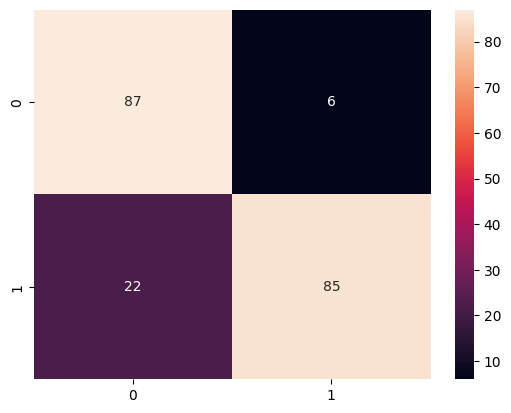

In [47]:
model=LogisticRegression()
model.fit(X_train_scaledo,Y_train_o)
y_predict=model.predict(X_Test_scaledo)
print(accuracy_score(Y_test_o,y_predict))
print(confusion_matrix(Y_test_o,y_predict))
print(classification_report(Y_test_o,y_predict))
sns.heatmap(confusion_matrix(Y_test_o,y_predict),annot=True)

[[84  9]
 [32 75]]
0.795
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        93
           1       0.89      0.70      0.79       107

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.79       200
weighted avg       0.81      0.80      0.79       200



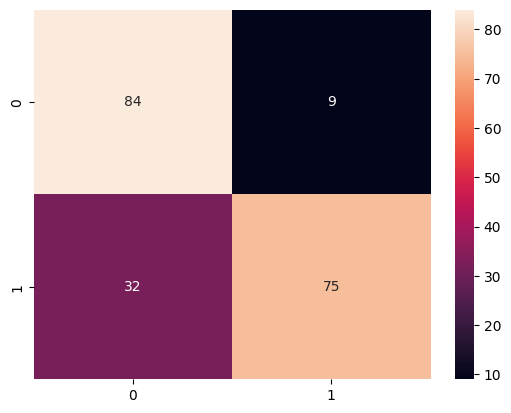

In [48]:
model2=GaussianNB()
model2.fit(X_train_scaledo,Y_train_o)
y_predict2=model2.predict(X_Test_scaledo)
sns.heatmap(confusion_matrix(Y_test_o,y_predict2),annot=True)
print(confusion_matrix(Y_test_o,y_predict2))
print(accuracy_score(Y_test_o,y_predict2))
print(classification_report(Y_test_o,y_predict2))

[[81 12]
 [15 92]]
0.865
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        93
           1       0.88      0.86      0.87       107

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200



([<matplotlib.axis.XTick at 0x7f56880cc950>,
 [Text(0, 0, 'f 5'),
  Text(1, 0, 'f 14'),
  Text(2, 0, 'f 18'),
  Text(3, 0, 'f 16'),
  Text(4, 0, 'f 2'),
  Text(5, 0, 'f 11'),
  Text(6, 0, 'f 12'),
  Text(7, 0, 'f 6'),
  Text(8, 0, 'f 15'),
  Text(9, 0, 'f 19'),
  Text(10, 0, 'f 17'),
  Text(11, 0, 'f 13'),
  Text(12, 0, 'f 8'),
  Text(13, 0, 'f 9'),
  Text(14, 0, 'f 10'),
  Text(15, 0, 'f 7'),
  Text(16, 0, 'f 4'),
  Text(17, 0, 'f 3'),
  Text(18, 0, 'f 1'),
  Text(19, 0, 'f 0')])

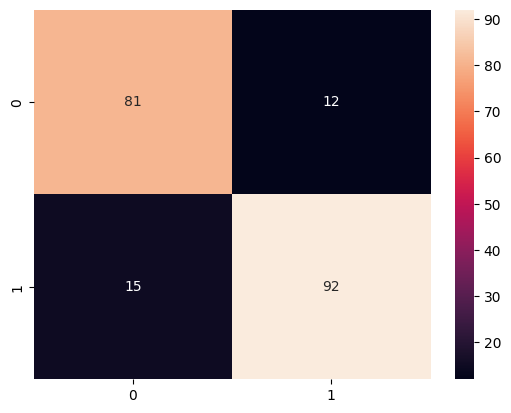

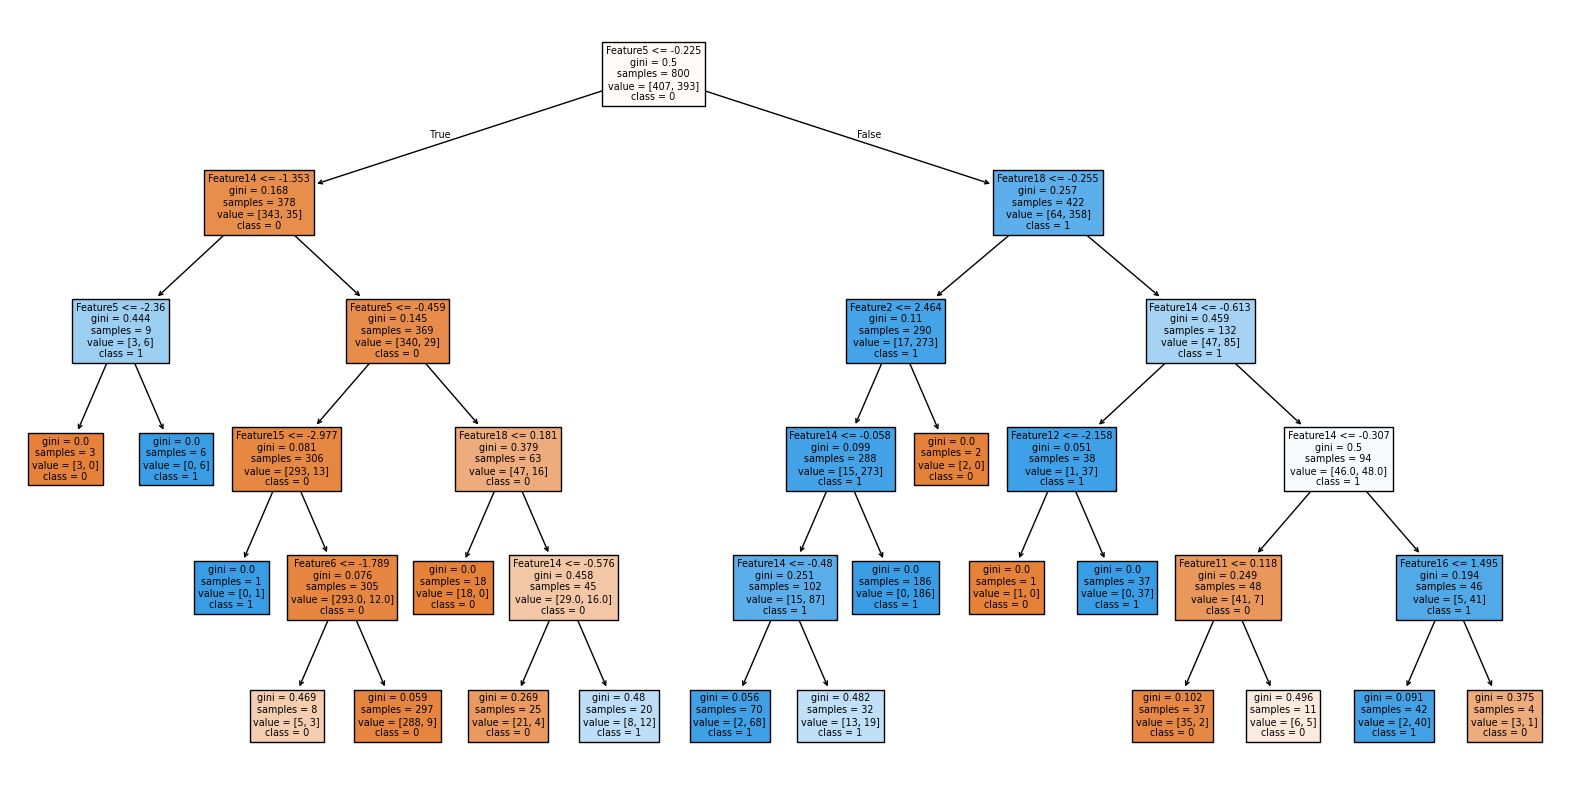

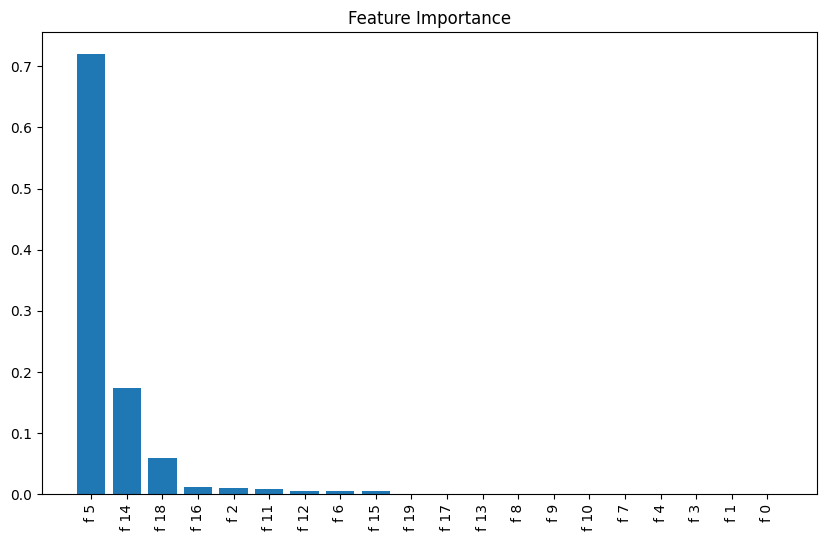

In [49]:
model3=DecisionTreeClassifier(random_state=42,max_depth=5)
model3.fit(X_train_scaledo,Y_train_o)
y_predict_tree=model3.predict(X_Test_scaledo)
sns.heatmap(confusion_matrix(Y_test_o,y_predict_tree),annot=True)
print(confusion_matrix(Y_test_o,y_predict_tree))
print(accuracy_score(Y_test_o,y_predict_tree))
print(classification_report(Y_test_o,y_predict_tree))
plt.figure(figsize=(20,10))
plot_tree(model3,filled=True,feature_names=[f'Feature{i}'for i in range(20)],class_names=['0','1'])
importance=model3.feature_importances_
indcies=np.argsort(importance)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(20),importance[indcies])
plt.xticks(range(20),[f'f {i}'for i in indcies],rotation=90)



(1000, 2)
2
0.89
[[95  6]
 [16 83]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       101
           1       0.93      0.84      0.88        99

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



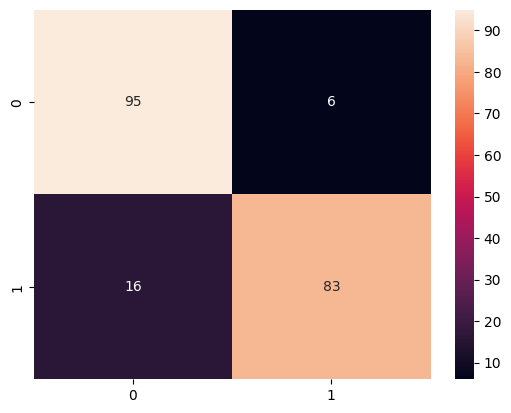

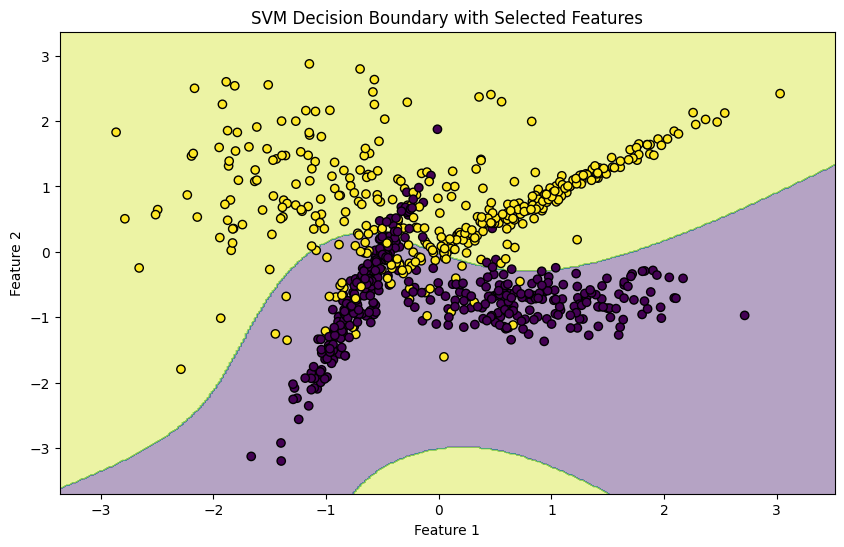

In [50]:
X_svm,Y_svm=make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,random_state=42)
df=pd.DataFrame(X_svm,Y_svm)
df["target"]=Y_svm
X_train,X_test,Y_train,Y_test=train_test_split(X_svm,Y_svm,test_size=0.2,random_state=42)
Scalar=StandardScaler()
X_train_scaled=Scalar.fit_transform(X_train)
X_Test_scaled=Scalar.fit_transform(X_test)
model=SVC(C=100, gamma=0.1,kernel='rbf',random_state=42)
model.fit(X_train_scaled,Y_train)
y_predict=model.predict(X_Test_scaled)
print(X_svm.shape)
print(len(np.unique(Y_svm)))
print(accuracy_score(Y_test,y_predict))
print(confusion_matrix(Y_test,y_predict))
print(classification_report(Y_test,y_predict))
sns.heatmap(confusion_matrix(Y_test,y_predict),annot=True)
# Function to plot decision boundary (for 2D visualization)
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(Scalar.transform(np.c_[xx.ravel(), yy.ravel()]))  # Ensure input data is scaled
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title('SVM Decision Boundary with Selected Features')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plt.figure(figsize=(10, 6))
plot_decision_boundary(model, X_train_scaled, Y_train)
plt.show()

0.885
[[84  9]
 [14 93]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        93
           1       0.91      0.87      0.89       107

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



([<matplotlib.axis.XTick at 0x7f5687e18110>,
 [Text(0, 0, 'f 5'),
  Text(1, 0, 'f 18'),
  Text(2, 0, 'f 1'),
  Text(3, 0, 'f 14'),
  Text(4, 0, 'f 11'),
  Text(5, 0, 'f 6'),
  Text(6, 0, 'f 2'),
  Text(7, 0, 'f 12'),
  Text(8, 0, 'f 10'),
  Text(9, 0, 'f 16'),
  Text(10, 0, 'f 15'),
  Text(11, 0, 'f 0'),
  Text(12, 0, 'f 13'),
  Text(13, 0, 'f 9'),
  Text(14, 0, 'f 4'),
  Text(15, 0, 'f 8'),
  Text(16, 0, 'f 7'),
  Text(17, 0, 'f 19'),
  Text(18, 0, 'f 17'),
  Text(19, 0, 'f 3')])

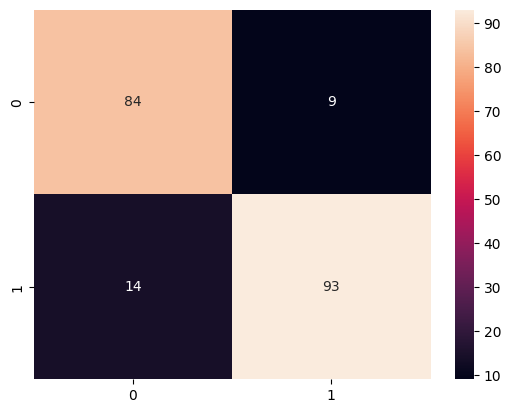

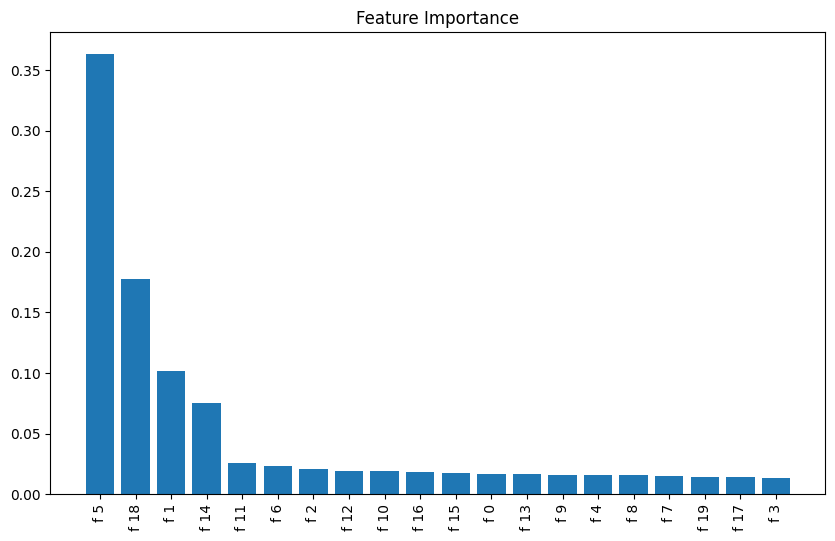

In [58]:
model5=RandomForestClassifier(n_estimators=100,random_state=42)
model5.fit(X_train_scaledo,Y_train_o)
y_predict5=model5.predict(X_Test_scaledo)
print(accuracy_score(Y_test_o,y_predict5))
print(confusion_matrix(Y_test_o,y_predict5))
print(classification_report(Y_test_o,y_predict5))
sns.heatmap(confusion_matrix(Y_test_o,y_predict5),annot=True)
importance=model5.feature_importances_
indcies=np.argsort(importance)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(20),importance[indcies])
plt.xticks(range(20),[f'f {i}'for i in indcies],rotation=90)


0.875
[[83 10]
 [15 92]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        93
           1       0.90      0.86      0.88       107

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



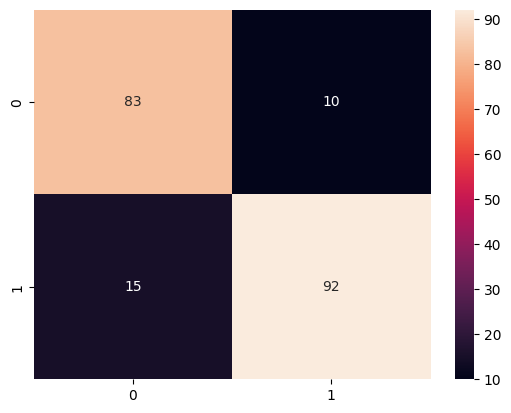

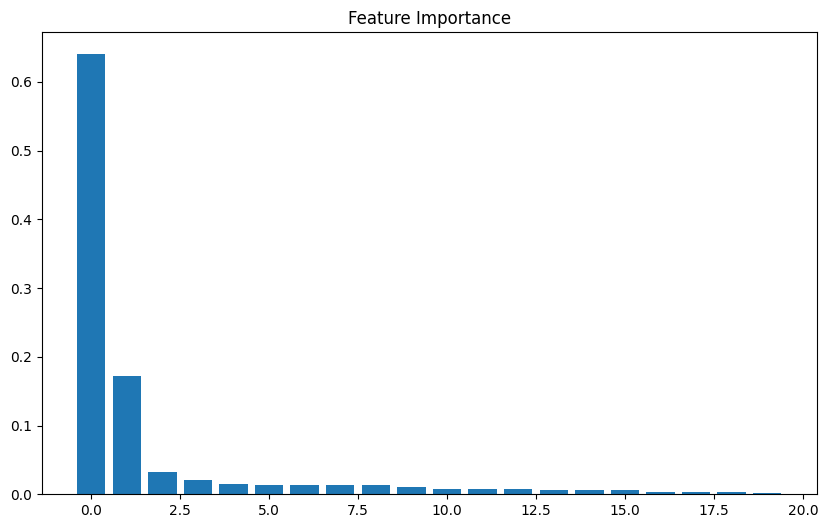

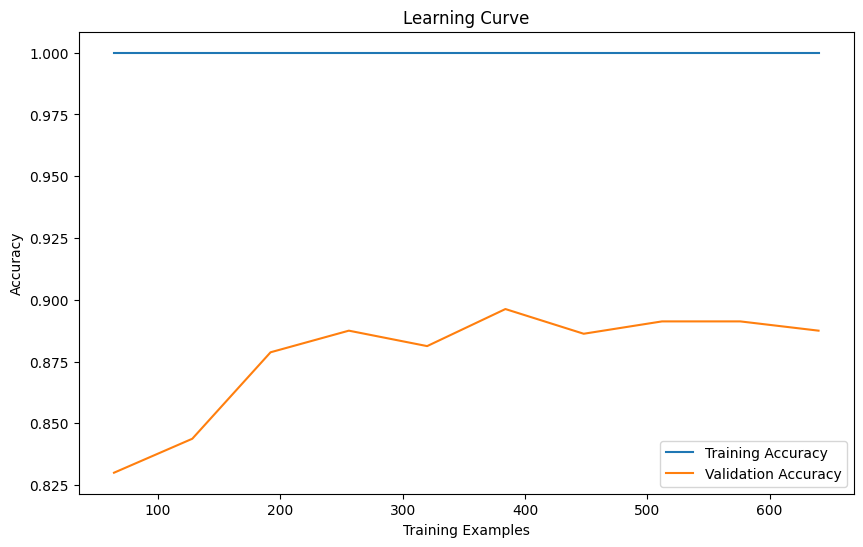

In [68]:
model6=GradientBoostingClassifier(n_estimators=380, learning_rate =0.1,random_state=42)
model6.fit(X_train_scaledo,Y_train_o)
y_predict6=model6.predict(X_Test_scaledo)
print(accuracy_score(Y_test_o,y_predict6))
print(confusion_matrix(Y_test_o,y_predict6))
print(classification_report(Y_test_o,y_predict6))
sns.heatmap(confusion_matrix(Y_test_o,y_predict6),annot=True)
importance=model6.feature_importances_
indcies=np.argsort(importance)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(20),importance[indcies])
train_sizes, train_scores, test_scores = learning_curve(model6, X_train_scaledo, Y_train_o, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()